# Dueling Double DQN Agent Performance Analysis

This notebook contains the analysis of the Dueling Double DQN Agent performance metrics, including detailed plots to evaluate the agent's performance.

In [2]:

import pandas as pd

# Load the data
file_path = '/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/logs/test/J7_TLS/con/dataDuelingDoubleDQNAgent_lr0.0001.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,l,r,id,ep,con_p_rate,ctrl_con_p_rate,veh_n_p_hour,veh_n,sum_delay,sum_waiting_time,...,avg_acc_waiting_time,avg_queue_length,densities,flows,ramp_queue_lengths,total_density,total_flow,total_ramp_queue_length,TimeLimit.truncated,done
0,781,45419.106880,rlcontroller,1,0.060,0.060,"[1100.0, 1100.0, 1300.0, 600.0]",12,11.645578,33.0,...,9.416667,1.2,"{'ramp12': 0.07598784194528876, 'ramp14': 0.09...","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}","{'ramp12': 4, 'ramp14': 4, 'ramp16': 4}",0.254089,9,12,False,True
1,786,44002.757868,rlcontroller,2,0.108,0.108,"[1400.0, 1500.0, 1100.0, 1500.0]",11,10.234399,14.0,...,5.545455,1.2,"{'ramp12': 0.10131712259371835, 'ramp14': 0.06...","{'ramp12': 4, 'ramp14': 2, 'ramp16': 3}","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}",0.248696,9,9,False,True
2,781,44289.044330,rlcontroller,3,0.124,0.124,"[1500.0, 800.0, 1400.0, 700.0]",12,11.576710,61.0,...,10.833333,1.8,"{'ramp12': 0.12664640324214793, 'ramp14': 0.12...","{'ramp12': 5, 'ramp14': 4, 'ramp16': 4}","{'ramp12': 13, 'ramp14': 13, 'ramp16': 13}",0.364115,13,39,False,True
3,789,43811.565838,rlcontroller,4,0.998,0.998,"[1100.0, 900.0, 1500.0, 700.0]",11,10.362243,4.0,...,5.636364,0.6,"{'ramp12': 0.12664640324214793, 'ramp14': 0.09...","{'ramp12': 5, 'ramp14': 3, 'ramp16': 3}","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}",0.304748,11,9,False,True
4,773,43076.002968,rlcontroller,5,0.717,0.717,"[900.0, 1200.0, 1200.0, 900.0]",11,10.734946,71.0,...,13.363636,1.6,"{'ramp12': 0.12664640324214793, 'ramp14': 0.12...","{'ramp12': 5, 'ramp14': 4, 'ramp16': 4}","{'ramp12': 13, 'ramp14': 13, 'ramp16': 13}",0.364115,13,39,False,True


In [3]:

# Compute descriptive statistics for the key metrics
descriptive_stats = data.describe()
descriptive_stats


,l,r,ep,con_p_rate,ctrl_con_p_rate,veh_n,sum_delay,sum_waiting_time,sum_acc_waiting_time,sum_queue_length,avg_delay,avg_waiting_time,avg_acc_waiting_time,avg_queue_length,total_density,total_flow,total_ramp_queue_length
count,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000
mean,785.184936,43518.269607,210.053865,0.498630,0.498630,11.479397,10.810716,39.453093,96.208726,4.372385,0.939895,3.298325,8.256277,0.874477,0.309667,11.049376,16.937786
std,9.871235,7739.490159,125.990954,0.291465,0.291465,1.434511,1.541358,47.783514,59.137524,3.201939,0.032476,3.943937,4.837873,0.640388,0.039137,1.378296,12.379097
min,750.000000,-57221.477243,1.000000,0.000000,0.000000,5.000000,4.100315,0.000000,0.000000,0.000000,0.818336,0.000000,0.000000,0.000000,0.169393,6.000000,0.000000
25%,779.000000,43888.879422,101.000000,0.246000,0.246000,11.000000,9.753694,2.000000,52.000000,1.000000,0.916048,0.181818,4.692308,0.200000,0.279418,10.000000,6.000000
50%,785.000000,44583.654808,206.000000,0.496000,0.496000,12.000000,10.764647,22.000000,84.000000,4.000000,0.949534,1.727273,7.181818,0.800000,0.308063,11.000000,15.000000
75%,792.000000,45270.899475,318.000000,0.749000,0.749000,12.000000,11.813941,67.000000,126.000000,8.000000,0.965492,5.600000,10.636364,1.600000,0.338785,12.000000,24.000000
max,822.000000,48626.335939,438.000000,1.000000,1.000000,15.000000,14.702605,866.000000,910.000000,12.000000,1.000000,66.615385,70.000000,2.400000,0.364115,13.000000,39.000000


In [4]:

# Compute the correlation matrix for numeric columns in the dataset
numeric_columns = data.select_dtypes(include='number').columns
correlation_matrix = data[numeric_columns].corr()
correlation_matrix


,l,r,ep,con_p_rate,ctrl_con_p_rate,veh_n,sum_delay,sum_waiting_time,sum_acc_waiting_time,sum_queue_length,avg_delay,avg_waiting_time,avg_acc_waiting_time,avg_queue_length,total_density,total_flow,total_ramp_queue_length
l,1.000000,0.088851,0.005832,-0.005977,-0.005977,0.112051,0.107104,0.042250,0.064513,0.031627,0.040956,0.033524,0.044167,0.031627,0.002365,0.001797,0.010171
r,0.088851,1.000000,0.007215,0.006232,0.006232,-0.011389,-0.008768,0.015446,0.019411,0.005142,0.005381,0.017684,0.022768,0.005142,-0.002990,-0.001692,0.005812
ep,0.005832,0.007215,1.000000,-0.010642,-0.010642,-0.003409,-0.004347,-0.002770,0.000054,-0.002493,-0.006456,-0.004336,-0.001601,-0.002493,-0.000003,0.000501,-0.000255
con_p_rate,-0.005977,0.006232,-0.010642,1.000000,1.000000,0.001663,0.000856,-0.010716,-0.012593,-0.010137,-0.000409,-0.011835,-0.014292,-0.010137,-0.007908,-0.007902,-0.009358
ctrl_con_p_rate,-0.005977,0.006232,-0.010642,1.000000,1.000000,0.001663,0.000856,-0.010716,-0.012593,-0.010137,-0.000409,-0.011835,-0.014292,-0.010137,-0.007908,-0.007902,-0.009358
veh_n,0.112051,-0.011389,-0.003409,0.001663,0.001663,1.000000,0.978751,0.354597,0.380036,0.560846,0.457083,0.281117,0.206308,0.560846,0.607441,0.586070,0.464433
sum_delay,0.107104,-0.008768,-0.004347,0.000856,0.000856,0.978751,1.000000,0.456985,0.477833,0.686993,0.627720,0.392837,0.317798,0.686993,0.668090,0.644845,0.564127
sum_waiting_time,0.042250,0.015446,-0.002770,-0.010716,-0.010716,0.354597,0.456985,1.000000,0.894860,0.734733,0.620857,0.990786,0.862182,0.734733,0.459766,0.449080,0.641423
sum_acc_waiting_time,0.064513,0.019411,0.000054,-0.012593,-0.012593,0.380036,0.477833,0.894860,1.000000,0.661944,0.624765,0.890604,0.976802,0.661944,0.439785,0.426302,0.550063
sum_queue_length,0.031627,0.005142,-0.002493,-0.010137,-0.010137,0.560846,0.686993,0.734733,0.661944,1.000000,0.830394,0.716123,0.593043,1.000000,0.719785,0.702667,0.867282


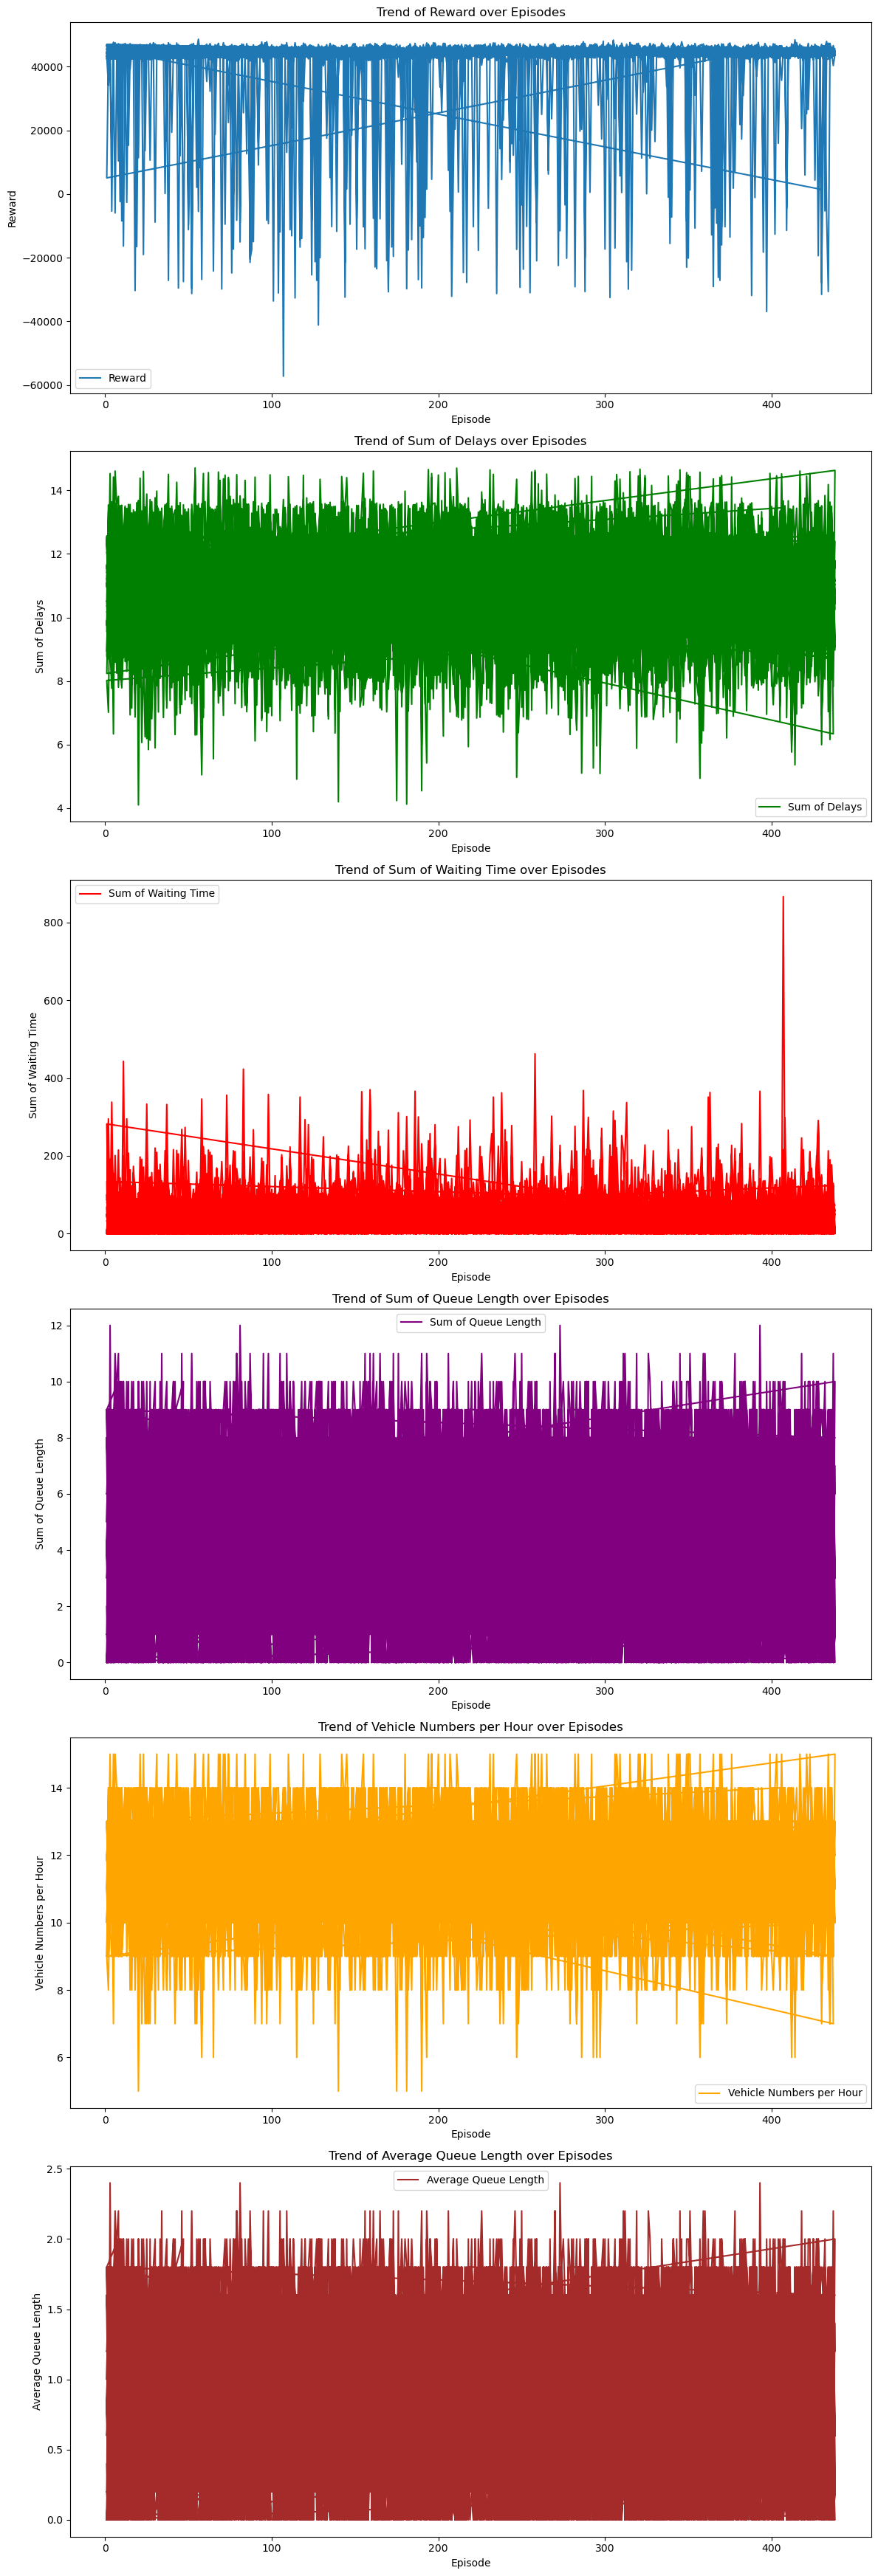

In [7]:

import matplotlib.pyplot as plt

# Plotting trends and relationships
fig, axes = plt.subplots(6, 1, figsize=(12, 35))

# 1. Trend of Reward over Episodes
axes[0].plot(data['ep'], data['r'], label='Reward')
axes[0].set_title('Trend of Reward over Episodes')
axes[0].set_xlabel('Episode')
axes[0].set_ylabel('Reward')
axes[0].legend()

# 2. Trend of Sum Delay over Episodes
axes[1].plot(data['ep'], data['sum_delay'], label='Sum of Delays', color='green')
axes[1].set_title('Trend of Sum of Delays over Episodes')
axes[1].set_xlabel('Episode')
axes[1].set_ylabel('Sum of Delays')
axes[1].legend()

# 3. Trend of Sum Waiting Time over Episodes
axes[2].plot(data['ep'], data['sum_waiting_time'], label='Sum of Waiting Time', color='red')
axes[2].set_title('Trend of Sum of Waiting Time over Episodes')
axes[2].set_xlabel('Episode')
axes[2].set_ylabel('Sum of Waiting Time')
axes[2].legend()

# 4. Trend of Sum Queue Length over Episodes
axes[3].plot(data['ep'], data['sum_queue_length'], label='Sum of Queue Length', color='purple')
axes[3].set_title('Trend of Sum of Queue Length over Episodes')
axes[3].set_xlabel('Episode')
axes[3].set_ylabel('Sum of Queue Length')
axes[3].legend()

# 5. Trend of Vehicle Numbers per Hour over Episodes
axes[4].plot(data['ep'], data['veh_n'], label='Vehicle Numbers per Hour', color='orange')
axes[4].set_title('Trend of Vehicle Numbers per Hour over Episodes')
axes[4].set_xlabel('Episode')
axes[4].set_ylabel('Vehicle Numbers per Hour')
axes[4].legend()

# 6. Trend of Average Queue Length over Episodes
axes[5].plot(data['ep'], data['avg_queue_length'], label='Average Queue Length', color='brown')
axes[5].set_title('Trend of Average Queue Length over Episodes')
axes[5].set_xlabel('Episode')
axes[5].set_ylabel('Average Queue Length')
axes[5].legend()


plt.tight_layout()
plt.show()


In [8]:

# Identifying episodes with extreme values for key metrics

# Highest and lowest values for each metric
extreme_values = {
    'Reward': {
        'Highest': data.loc[data['r'].idxmax()],
        'Lowest': data.loc[data['r'].idxmin()]
    },
    'Sum Delay': {
        'Highest': data.loc[data['sum_delay'].idxmax()],
        'Lowest': data.loc[data['sum_delay'].idxmin()]
    },
    'Sum Waiting Time': {
        'Highest': data.loc[data['sum_waiting_time'].idxmax()],
        'Lowest': data.loc[data['sum_waiting_time'].idxmin()]
    },
    'Sum Queue Length': {
        'Highest': data.loc[data['sum_queue_length'].idxmax()],
        'Lowest': data.loc[data['sum_queue_length'].idxmin()]
    }
}

extreme_values_df = pd.DataFrame(extreme_values)
extreme_values_df


,Reward,Sum Delay,Sum Waiting Time,Sum Queue Length
Highest,l ...,l ...,l ...,l ...
Lowest,l ...,l ...,l ...,l ...


In [9]:

# Correlation between control policy rate (con_p_rate) and key metrics
key_metrics = ['r', 'sum_delay', 'sum_waiting_time', 'sum_queue_length']
policy_impact_corr = data[key_metrics + ['con_p_rate']].corr()['con_p_rate']
policy_impact_corr


r                   0.006232
sum_delay           0.000856
sum_waiting_time   -0.010716
sum_queue_length   -0.010137
con_p_rate          1.000000
Name: con_p_rate, dtype: float64